Kita akan membuat suatu model yang dapat memprediksi apakah customer akan melakukan pembelian setelah mengunjungi beberapa halaman e-commerce

Dataset ini adalah data pembeli online yang mengunjungi website dari suatu e-commerce selama 1 tahun. Pertama-tama kita akan mengeksplorasi datasetnya

In [1]:
import pandas as pd

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())

Shape dataset: (12330, 18)

Lima data teratas:
    Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         

Dengan mengetahui dimensi data yaitu jumlah baris dan kolom, kita bisa mengetahui apakah data kita terlalu banyak atau justru terlalu sedikit. Jika data terlalu banyak, waktu melatih model akan lebih lama, sedangkan jika data terlalu sedikit, performansi data yang kita hasilkan mungkin tidak cukup bagus, karena tidak mampu mengenali pola dengan baik.

Data eksplorasi tidaklah cukup dengan mengetahui dimensi data dan statistical properti saja, tetapi kita juga perlu sedikit menggali tentang hubungan atau korelasi dari setiap feature.

## Sekarang kita akan melihat korelasi dan distribusi dataset

In [2]:
dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())

Korelasi dataset:
                          Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601466   
Administrative_Duration        0.601466                 1.000000   
Informational                  0.376782                 0.302647   
Informational_Duration         0.255757                 0.237959   
ProductRelated                 0.430832                 0.288869   
ProductRelated_Duration        0.373647                 0.355238   
BounceRates                   -0.223474                -0.144128   
ExitRates                     -0.316192                -0.205618   
PageValues                     0.098771                 0.067463   
SpecialDay                    -0.095054                -0.073472   
OperatingSystems              -0.006459                -0.007425   
Browser                       -0.025243                -0.015525   
Region                        -0.005680                -0.005681   
TrafficType                  

Mengetahui distribusi dataset sangat penting untuk permasalahan klasifikasi, karena jika distribusi label sangat tidak seimbang (imbalance class), maka akan sulit bagi model untuk mempelajari pola dari LABEL yang sedikit dan hasilnya bisa misleading

Sekarang kita coba inspeksi nilai korelasi dari fitur-fitur berikut pada <b>dataset_corr</b> yang telah diberikan sebelumnya
* ExitRates dan BpunceRates
* Revenue dan PageValues
* TrafficType dan Weekend

In [3]:
print('\nKorelasi BounceRates-ExitRates:', dataset_corr.loc['BounceRates', 'ExitRates'])
print('\nKorelasi Revenue-PageValues:', dataset_corr.loc['Revenue', 'PageValues'])
print('\nKorelasi TrafficType-Weekend:', dataset_corr.loc['TrafficType', 'Weekend'])


Korelasi BounceRates-ExitRates: 0.9134364214595573

Korelasi Revenue-PageValues: 0.49256929525120574

Korelasi TrafficType-Weekend: -0.0022212292430310644


Selain dengan statistik, kita juga bisa melakukan eksplorasi data dengan pendekatan visual. Dengan visualisasi kita dapat dengan mudah dan cepat dalam memahami data, bahkan dapat memberikan pemahaman yang lebih baik terkait hubungan setiap variabel/features

C:\Users\tkwt.bda\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tkwt.bda\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


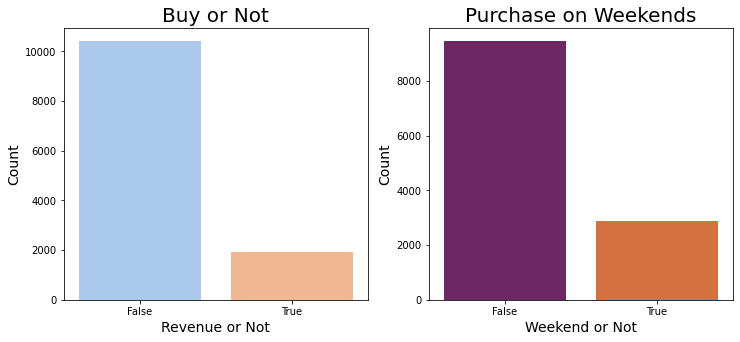

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1,2,1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or Not', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
# checking the Distribution of customers on Weekend
plt.subplot(1,2,2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or Not', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()


Sekarang kita akan membuat visualisasi berupa histogram yang menggambarkan jumlah customer untuk setiap Region

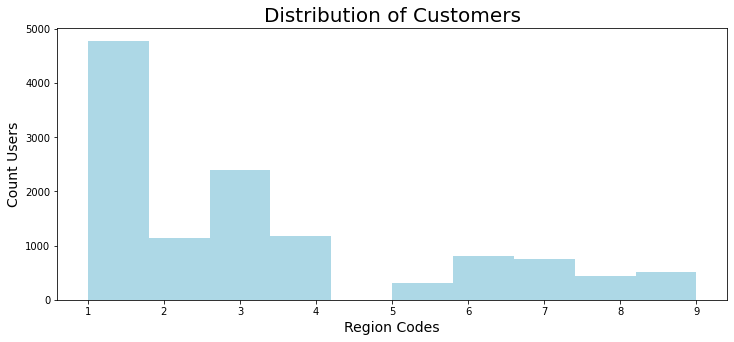

In [5]:
# visualizing the distribution of customers around the Region
plt.hist(dataset['Region'], color = 'lightblue')
plt.title('Distribution of Customers', fontsize = 20)
plt.xlabel('Region Codes', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

## Sekarang kita akan cek dan menghitung jumlah <b>missing value</b> dari setiap features

In [6]:
#checking missing value for each feature  
print('Checking missing value for each feature:')
print(dataset.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(dataset.isnull().sum().sum())

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:
112


Dari data di atas terdapat missing value di beberapa features.

Ada beberapa metode yang dapat kita terapkan untuk mengatasi missing value dan salah satunya adalah menghapus data tersebut. Tetapi, metode ini tidak serta merta diimplementasikan. Kita juga perlu menganalisis penyebaran missing value, dan berapa persen jumlah missing value dalam data kita.

Metode ini dapat diterapkan jika tidak banyak missing value dalam data kita, sehingga walaupun datapoint ini dihapus, kita masih memiliki jumlah data yang cukup untuk melatih model machine learning. Tetapi jika memiliki banyak missing value dan tersebar di seluruh features, maka metode menghapus missing value tidak dapat digunakan. Kita akan kehilangan sejumlah data yang kemudian akan memengaruhi performansi model.

## Sekarang kita akan menghapus datapoint pada features yang memiliki <b>missing value</b>

In [7]:
#Drop rows with missing value   
dataset_clean = dataset.dropna()  
print('Ukuran dataset_clean:', dataset_clean.shape) 

Ukuran dataset_clean: (12316, 18)


Selain metode menghapus, kita bisa menggunakan metode <b>input missing value</b>, yaitu mengisi record yang hilang ini dengan suatu nilai. Ada berbagai teknik dalam metode inputing, mulai dari yang paling sederhana yaitu mengisi missing value dengan nilai mean, median, modus, atau nilai konstan, sampai teknik paling advance yaitu dengan menggunakan nilai yang diestimasi oleh suatu predictive model.

Untuk kasus ini, kita akan menggunakan inputing sederhana yaitu menggunakan nilai rataan atau mean

In [8]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

print("Before imputation:")
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with mean of feature value  
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

C:\Users\tkwt.bda\AppData\Local\Temp/ipykernel_24000/1654067313.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


In [11]:
dataset1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')

print("Before imputation:")
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with median of feature value  
dataset1.fillna(dataset1.median(), inplace = True)
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

C:\Users\tkwt.bda\AppData\Local\Temp/ipykernel_24000/3874403282.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset1.fillna(dataset1.median(), inplace = True)


In [13]:
display(dataset.head())
print(dataset.describe())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.317798                80.906176       0.503979   
std          3.320867               176.759988       1.269980   
min          0.000000                -1.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 8.000000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.506387       31.763884              1196.037057   
std                140.745501       44.465072              1913.285284   
min                 -1.000000        0.000000                -1.000000   
25%                  0.000000        7.00000

Dari data di atas, rentang nilai dari setiap feature cukup bervariasi. Misalnya, <b>ProductRelated_Duration</b> vs <b>BounceRates</b>. <b>ProductRelated_Duration</b> memiliki rentang nilai mulai dari 0 - 600an; sedangkan <b>BounceRates</b> rentang nilainya 0 - 2.

Beberapa machine learning mengharuskan semua variabel memiliki rentang nilai yang sama, karena jika tidak sama, feature dengan rentang nilai terbesar otomatis akan menndominasi dalam proses training/komputasi, sehingga model yang dihasilkan akan sangat bias. Oleh karena itu, sebelum memulai training model, kita terlebih dahulu perlu melakukan data rescaling ke dalam rentang 0 dan 1, sehingga semua feature berada dalam rentang nilai tersebut, yaitu nilai <b>max = 1<b> dan nilai <b>min = 0<b>
    
## Kenapa ke range 0 - 1?

Karena rumus dari rescaling adalah :

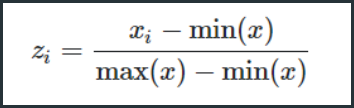

## Sekarang kita akan melakukan scaling pada dataset kita.

In [15]:
from sklearn.preprocessing import MinMaxScaler  
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
scaling_column = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


Proses scaling hanya bisa dilakukan pada feature yang bertipe numerik

Dalam dataset, kita memiliki 2 kolom yang bertipe <b>object</b> yang dinyatakan dalam tipe data <b>str</b>, yaitu kolom __Month__ dan __VisitorType__. Karena setap algoritma machine learning bekerja dengan tipe data numerik, maka kita perlu mengubah tipe pandas object atau str ini ke bertipe numerik.

In [16]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


C:\Users\tkwt.bda\AppData\Local\Temp/ipykernel_24000/509007088.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


Library **LabelEncoder** akan mengurutkan label secara alfabetik, posisi/indeks dari setiap label ini digunakan sebagai nilai numerik (dalam hal ini tipe data int). Dengan demikian kita telah membuat dataset kita menjadi dataset bernilai numerik seluruhnya dan siap digunakan untuk pemodelan dengan algoritma machine learning tertentu

Dalam dataset kita, lagel target sudah diketahui, yaitu kolom __Revenue__ yang bernilai __True__ untuk user membeli dan __False__ untuk yang tidak membeli, sehingga pemodelan yang dilakukan ini adalah klasifikasi. Untuk melatih dataset kita, dataset, perlu dipisahkan dalam __Features__ dan __Label/Target__. Variabel Feature akan terdiri dari variabel yang dideklarasikan sebagai __X__ dan __[Revenue]__ adalah variabel Target yang dideklarasikan sebagai __y__

In [17]:
# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis=1)
# assigning the target column Revenue to y
y = dataset['Revenue']
# checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)


Sebelum kita melatih dataset kita, dataset perlu dibagi ke dalam __training dataset__ dan __test dataset__ dengan perbandingan 80:20. 80% digunakan untuk training dan 20% untuk proses testing

## Kenapa perlu ada training dan testing?

Fungsi training adalah untuk melatih model untuk mengenali pola dalam data, sedangkan fungsing testing adalah untuk memastikan bahwa model yang telah dilatih mampu dengan baik memprediksi label dari new observation dan belum dipelajari oleh model sebelumnya

In [18]:
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)
# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test : (2466, 17)
Shape of y_test : (2466,)


Sekarang kita akan melatih model kita atau training.

## Pada kasus ini kita akan menggunakan fungsi DecisionTreeClassifier()

In [19]:
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
model = DecisionTreeClassifier()
# Fit the classifier to the training data
model = model.fit(X_train, y_train)

Setelah model/classifier terbentuk, selanjutnya kita menggunakan model ini untuk memprediksi __Label__ dari testing dataset __(X_test)__

In [20]:
# Apply the classifier/model to the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

(2466,)


Setelah itu kita melakukan evaluasi dari model kita. Untuk evaluasi model performance, setiap algoritma memiliki matrik yang berbeda-beda. Metrik paling sederhana untuk mengecek performansi model adalah __accuracy__. Tetapi banyak real problem, accuracy saja tidaklah cukup. Metode lain yang digunakan adalah __Confusion Matrix__. Confusion Matrix merepresentasikan perbandingan prediksi dan real LABEL dari test dataset yang dihasilkan oleh algoritma machine learning

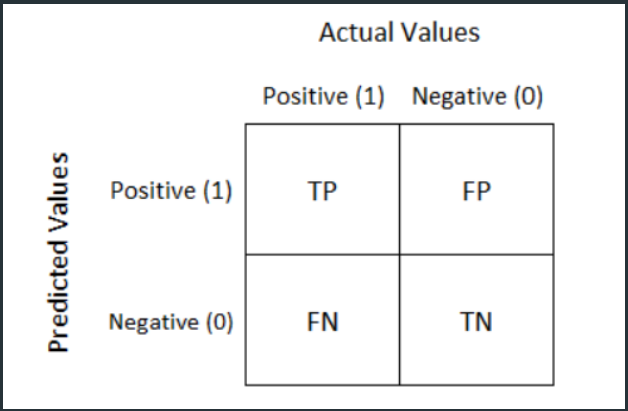

* __True Positive (TP)__ : Jika user __diprediksi membeli (Positif)__, dan user __aktualnya benar membeli (Positif) 
* __True Negative (TN)__ : Jika user __diprediksi tidak membeli (Negatif)__, dan user __aktualnya tidak membeli (Positif)
* __False Positive (FP)__ : Jika user __diprediksi membeli (Positif)__, dan user __aktualnya tidak membeli (Negatif) 
* __False Negative (FN)__ : Jika user __diprediksi tidak membeli (Negatif)__, dan user __aktualnya benar membeli (Positif) 

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8536090835360909

Confusion matrix:
[[1875  169]
 [ 192  230]]

Classification report:
              precision    recall  f1-score   support

       False       0.91      0.92      0.91      2044
        True       0.58      0.55      0.56       422

    accuracy                           0.85      2466
   macro avg       0.74      0.73      0.74      2466
weighted avg       0.85      0.85      0.85      2466



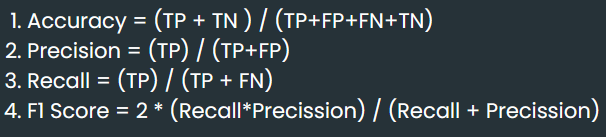

## Pakai Metrik yang Mana?

Jika dataset memiliki jumlah data False Negatif dan False Positif yang seimbang (Symmetric), maka bisa gunakan __Accuracy__, tetapi jika tidak seimbang, maka sebaiknya menggunakan __F1-Score__.

Dalam suatu problem, jika lebih memilih False Positif lebih baik terjadi daripada False Negatif, misalnya: Dalam kasus Fraud/Scam, kecenderungan model mendeteksi transaksi sebagai fraud walaupun kenyataannya bukan, dianggap lebih baik, daripada transaksi tersebut tidak terdeteksi sebagai fraud tetapi ternyata fraud. Untuk problem ini sebaiknya menggunakan __Recall__.

Sebaliknya, jika lebih menginginkan terjadinya True Negatif dan sangat tidak menginginkan terjadinya False Positif, sebaiknya menggunakan __Precision__.

Contohnya adalah pada kasus klasifikasi email SPAM atau tidak. Banyak orang lebih memilih jika email yang sebenarnya tidak SPAM namun diprediksi tidak SPAM (sehingga tetap ada pada kotak masuk email kita), daripada email yang sebenarnya bukan SPAM tapi diprediksi SPAM (sehingga tidak ada pada kotak masuk email).